In [ ]:
# Pandas is used for data manipulation
import pandas as pd

# Read in data as pandas dataframe and display first 5 rows
features = pd.read_csv('Manova.csv')
features.head(5)

,OBS,Memory,Spatial,Verbal,communication,education level
0,Obs1,50,33,14,2,1
1,Obs2,64,28,56,22,2
2,Obs3,65,28,46,15,3
3,Obs4,67,31,56,24,2
4,Obs5,63,28,51,15,2


In [ ]:
print('The shape of our features is:', features.shape)

The shape of our features is: (150, 6)


In [ ]:
features = pd.get_dummies(features)
features.head(5)

,Memory,Spatial,Verbal,communication,education level,OBS_Obs1,OBS_Obs10,OBS_Obs100,OBS_Obs101,OBS_Obs102,OBS_Obs103,OBS_Obs104,OBS_Obs105,OBS_Obs106,OBS_Obs107,OBS_Obs108,OBS_Obs109,OBS_Obs11,OBS_Obs110,OBS_Obs111,OBS_Obs112,OBS_Obs113,OBS_Obs114,OBS_Obs115,OBS_Obs116,OBS_Obs117,OBS_Obs118,OBS_Obs119,OBS_Obs12,OBS_Obs120,OBS_Obs121,OBS_Obs122,OBS_Obs123,OBS_Obs124,OBS_Obs125,OBS_Obs126,OBS_Obs127,OBS_Obs128,OBS_Obs129,OBS_Obs13,...,OBS_Obs63,OBS_Obs64,OBS_Obs65,OBS_Obs66,OBS_Obs67,OBS_Obs68,OBS_Obs69,OBS_Obs7,OBS_Obs70,OBS_Obs71,OBS_Obs72,OBS_Obs73,OBS_Obs74,OBS_Obs75,OBS_Obs76,OBS_Obs77,OBS_Obs78,OBS_Obs79,OBS_Obs8,OBS_Obs80,OBS_Obs81,OBS_Obs82,OBS_Obs83,OBS_Obs84,OBS_Obs85,OBS_Obs86,OBS_Obs87,OBS_Obs88,OBS_Obs89,OBS_Obs9,OBS_Obs90,OBS_Obs91,OBS_Obs92,OBS_Obs93,OBS_Obs94,OBS_Obs95,OBS_Obs96,OBS_Obs97,OBS_Obs98,OBS_Obs99
0,50,33,14,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,64,28,56,22,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,65,28,46,15,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,67,31,56,24,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,63,28,51,15,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
print('Shape of features after one-hot encoding:', features.shape)

Shape of features after one-hot encoding: (150, 155)


In [ ]:
# Use numpy to convert to arrays
import numpy as np

# Labels are the values we want to predict
labels = np.array(features['Verbal'])

# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('Verbal', axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)

# Convert to numpy array
features = np.array(features)

In [ ]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25,
                                                                           random_state = 42)

In [ ]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (112, 154)
Training Labels Shape: (112,)
Testing Features Shape: (38, 154)
Testing Labels Shape: (38,)


In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model 
rf = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Train the model on training data
rf.fit(train_features, train_labels);

In [ ]:
rf_new = RandomForestRegressor(n_estimators = 100, criterion = 'mse', max_depth = None, 
                               min_samples_split = 2, min_samples_leaf = 1)

In [ ]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

# Calculate the absolute errors
errors = abs(predictions - test_labels)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 2.34 degrees.


In [ ]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 93.25 %.


In [ ]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest
tree = rf.estimators_[5]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Write graph to a png file
graph.write_png('tree.png');

In [ ]:
print('The depth of this tree is:', tree.tree_.max_depth)

The depth of this tree is: 12


In [ ]:
# Limit depth of tree to 2 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3, random_state=42)
rf_small.fit(train_features, train_labels)

# Extract the small tree
tree_small = rf_small.estimators_[5]

# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)

(graph, ) = pydot.graph_from_dot_file('small_tree.dot')

graph.write_png('small_tree.png')

In [ ]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: education level      Importance: 0.5
Variable: communication        Importance: 0.46
Variable: Memory               Importance: 0.04
Variable: Spatial              Importance: 0.0
Variable: OBS_Obs1             Importance: 0.0
Variable: OBS_Obs10            Importance: 0.0
Variable: OBS_Obs100           Importance: 0.0
Variable: OBS_Obs101           Importance: 0.0
Variable: OBS_Obs102           Importance: 0.0
Variable: OBS_Obs103           Importance: 0.0
Variable: OBS_Obs104           Importance: 0.0
Variable: OBS_Obs105           Importance: 0.0
Variable: OBS_Obs106           Importance: 0.0
Variable: OBS_Obs107           Importance: 0.0
Variable: OBS_Obs108           Importance: 0.0
Variable: OBS_Obs109           Importance: 0.0
Variable: OBS_Obs11            Importance: 0.0
Variable: OBS_Obs110           Importance: 0.0
Variable: OBS_Obs111           Importance: 0.0
Variable: OBS_Obs112           Importance: 0.0
Variable: OBS_Obs113           Importance: 0.0
Variable: O

In [ ]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Extract the two most important features
important_indices = [feature_list.index('Spatial'), feature_list.index('Memory')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]

# Train the random forest
rf_most_important.fit(train_important, train_labels)

# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)

errors = abs(predictions - test_labels)

# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape

print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 3.67 degrees.
Accuracy: 90.47 %.


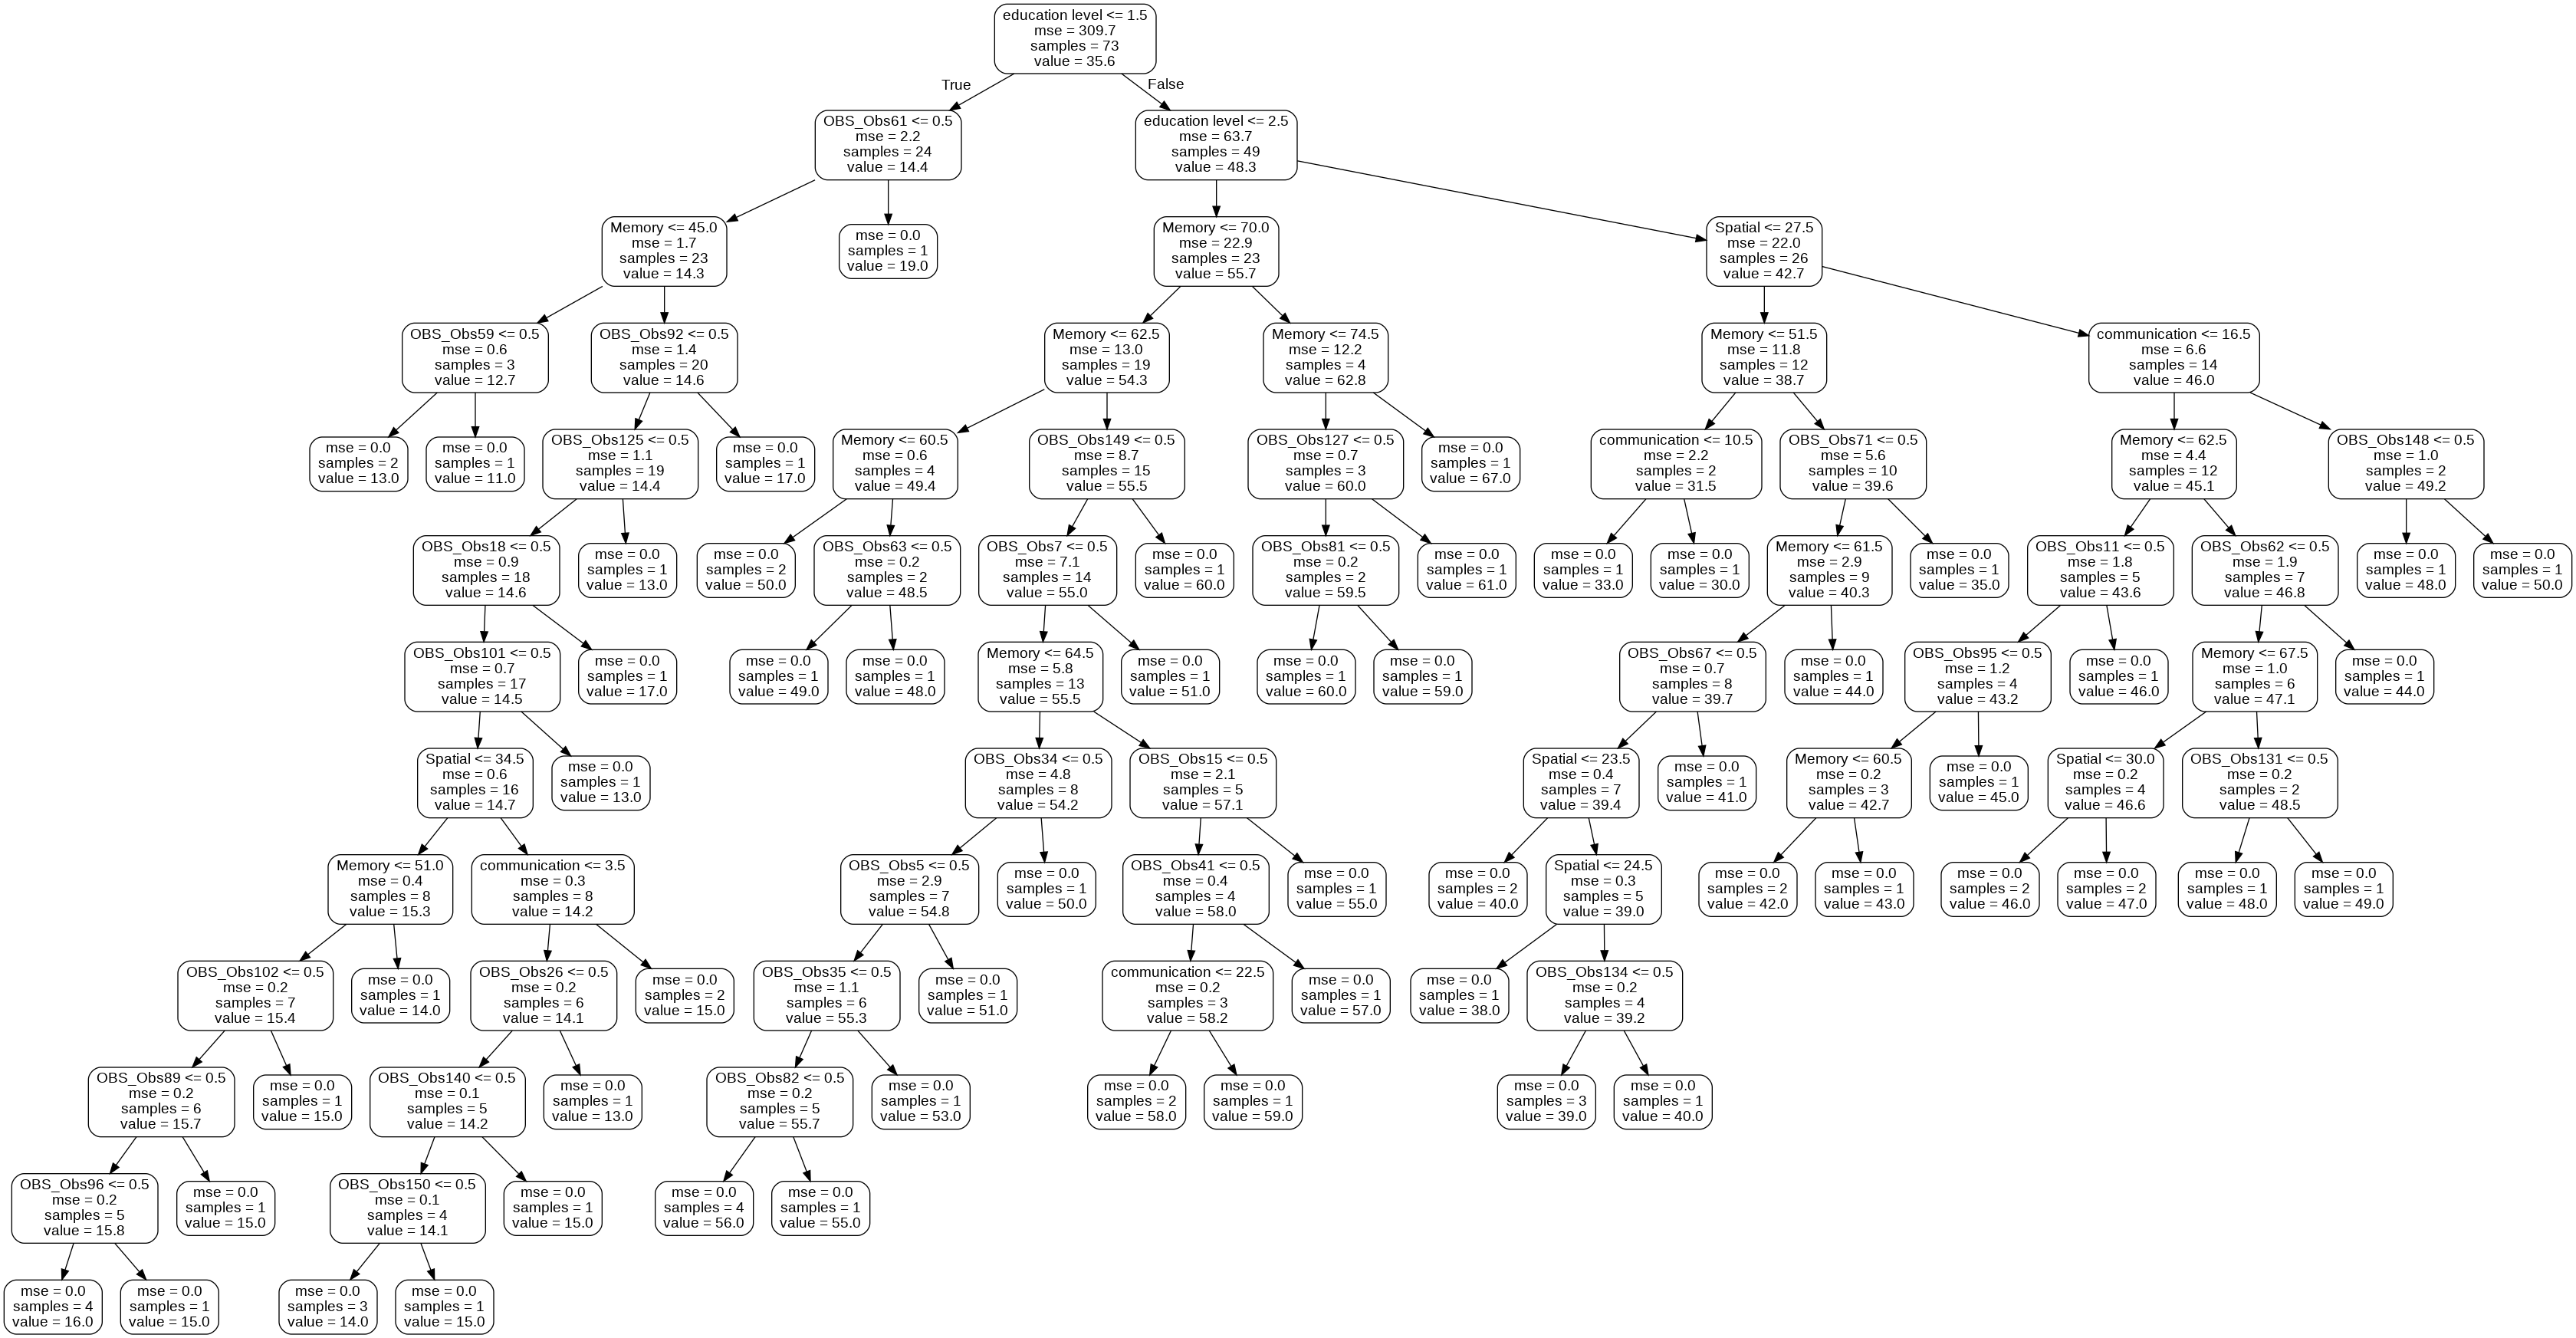

In [ ]:
from IPython.display import Image
Image('tree.png')

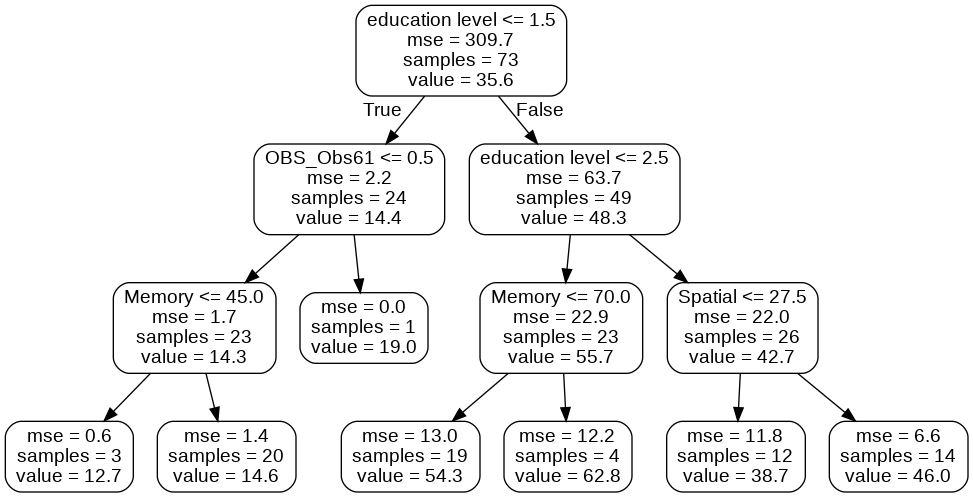

In [ ]:
from IPython.display import Image
Image('small_tree.png')

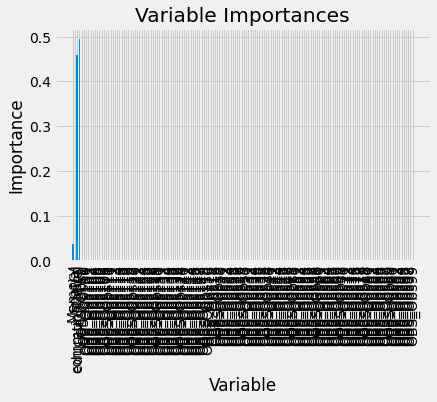

In [98]:
import matplotlib.pyplot as plt

%matplotlib inline

# Set the style
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');